In [14]:
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import numpy as np
import datetime as dt

# Production

In [15]:
# Load file
production_df = pd.read_csv("Resources/gender_calc/producing_percent.csv")
production_df = production_df.sort_values('release_date')
production_df

,movie_id,release_date,percent_female
11710,43395,1950-01-01,0.0
8734,83015,1950-01-01,0.0
10863,109364,1950-01-01,0.0
1580,43391,1950-01-04,0.0
10727,151310,1950-01-13,0.0
...,...,...,...
13212,252983,2017-12-31,0.0
14108,332283,2018-04-25,0.0
12505,38700,2018-11-07,0.0
14259,299782,2018-12-31,0.0


In [63]:
# change release_date column from string to datetime
# https://stackoverflow.com/questions/40217369/python-linear-regression-predict-by-date
# https://pandas.pydata.org/docs/reference/api/pandas.Timestamp.toordinal.html

production_df['release_date'] = pd.to_datetime(production_df['release_date'])
production_df.dtypes

movie_id                   int64
release_date      datetime64[ns]
percent_female           float64
year_month                 int64
dtype: object

In [18]:
# Use Pandas.to_datetime() and datetime.strftime() method to add year_month column
production_df['year_month'] = pd.to_datetime(production_df['release_date']).dt.strftime('%Y-%m')
production_df

,movie_id,release_date,percent_female,year_month
11710,43395,1950-01-01,0.0,1950-01
8734,83015,1950-01-01,0.0,1950-01
10863,109364,1950-01-01,0.0,1950-01
1580,43391,1950-01-04,0.0,1950-01
10727,151310,1950-01-13,0.0,1950-01
...,...,...,...,...
13212,252983,2017-12-31,0.0,2017-12
14108,332283,2018-04-25,0.0,2018-04
12505,38700,2018-11-07,0.0,2018-11
14259,299782,2018-12-31,0.0,2018-12


In [19]:
# convert year_month column to datetime format
production_df['year_month'] = pd.to_datetime(production_df['year_month'])
production_df.dtypes

movie_id                   int64
release_date      datetime64[ns]
percent_female           float64
year_month        datetime64[ns]
dtype: object

In [20]:
# convert year_month to ordinal for ML
production_df['year_month']=production_df['year_month'].map(dt.datetime.toordinal)
production_df.dtypes

movie_id                   int64
release_date      datetime64[ns]
percent_female           float64
year_month                 int64
dtype: object

In [21]:
prod_count = production_df.groupby(['year_month'])['percent_female'].mean()
prod_count

year_month
711858    0.000000
711889    0.000000
711917    0.000000
711948    0.000000
711978    0.000000
            ...   
736664    0.206349
736785    0.000000
736999    0.000000
737029    0.000000
737760    0.000000
Name: percent_female, Length: 820, dtype: float64

DONT RERUN

In [22]:
# Change from series to df
production = prod_count.to_frame()

# Reset index  DO NOT RERUN
# Reset index  DO NOT RERUN
production = production.rename_axis('year_month').reset_index()

# Review df
production

,year_month,percent_female
0,711858,0.000000
1,711889,0.000000
2,711917,0.000000
3,711948,0.000000
4,711978,0.000000
...,...,...
815,736664,0.206349
816,736785,0.000000
817,736999,0.000000
818,737029,0.000000


Review data distribution before applying ML model

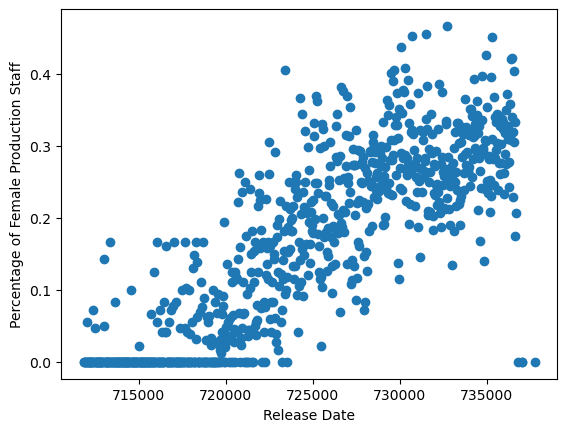

In [23]:
# Preview data
plt.scatter(production.year_month, production.percent_female)
plt.xlabel('Release Date')
plt.ylabel('Percentage of Female Production Staff')
plt.show()

In [25]:
#  x axis 
X = production.year_month.values.reshape(-1, 1)
X

array([[711858],
       [711889],
       [711917],
       [711948],
       [711978],
       [712009],
       [712039],
       [712070],
       [712101],
       [712131],
       [712162],
       [712192],
       [712223],
       [712254],
       [712282],
       [712313],
       [712343],
       [712374],
       [712404],
       [712435],
       [712466],
       [712496],
       [712527],
       [712557],
       [712588],
       [712619],
       [712648],
       [712679],
       [712709],
       [712740],
       [712770],
       [712801],
       [712832],
       [712862],
       [712893],
       [712923],
       [712954],
       [712985],
       [713013],
       [713044],
       [713074],
       [713105],
       [713135],
       [713166],
       [713197],
       [713227],
       [713258],
       [713288],
       [713319],
       [713350],
       [713378],
       [713409],
       [713439],
       [713470],
       [713500],
       [713531],
       [713562],
       [713592],
       [713623

In [26]:
y = production.percent_female
y

0      0.000000
1      0.000000
2      0.000000
3      0.000000
4      0.000000
         ...   
815    0.206349
816    0.000000
817    0.000000
818    0.000000
819    0.000000
Name: percent_female, Length: 820, dtype: float64

In [27]:
model_prod = LinearRegression()

In [28]:
model_prod.fit(X, y)

LinearRegression()

In [29]:
yp_pred = model_prod.predict(X)
print(yp_pred.shape)
print(len(yp_pred))

(820,)
820


In [34]:
X_transform = pd.Series(list(X))
X_transform = X_transform.apply(dt.datetime.fromordinal)
X_transform = pd.to_datetime(X_transform).dt.strftime('%Y-%m')
X_transform

0      1950-01
1      1950-02
2      1950-03
3      1950-04
4      1950-05
        ...   
815    2017-12
816    2018-04
817    2018-11
818    2018-12
819    2020-12
Length: 820, dtype: object

Production Graph

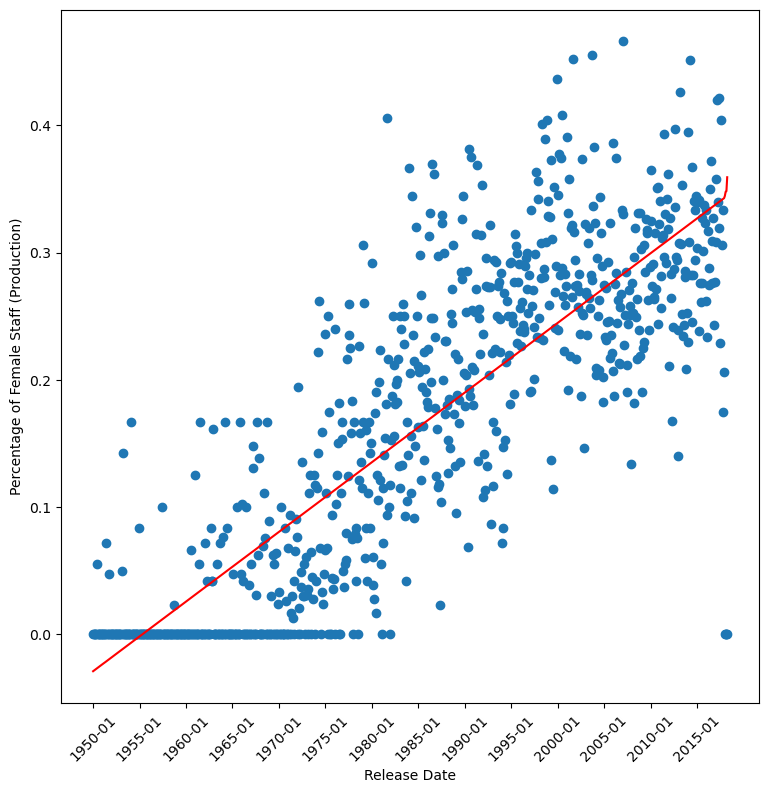

In [37]:
plt.figure(figsize=(9,9))

plt.scatter(X_transform, y)
plt.plot(X_transform, yp_pred, color='red')
plt.xlabel('Release Date')
plt.ylabel('Percentage of Female Staff (Production)')

plt.xticks(np.arange(0, len(X_transform)+1, 60),rotation=45)

plt.show()

Production linear regression equation

In [38]:
print('Weight coefficients: ', model_prod.coef_)
print('y-axis intercept: ', model_prod.intercept_)

Weight coefficients:  [1.49822411e-05]
y-axis intercept:  -10.694142159215508


In [40]:
production.corr()

,year_month,percent_female
year_month,1.0000,0.8373
percent_female,0.8373,1.0000


In [41]:
def calc_year_month(slope, intercept, y_value):
    return (y_value- intercept)/slope


When would we have a 50% of female participation in the Production department according to the linear regression model?

In [42]:
production_fiftypercent = calc_year_month(model_prod.coef_,model_prod.intercept_, 0.5)
print(production_fiftypercent)

[747160.72917789]


Production Accuracy

In [56]:
predictions_prod = model_prod.predict(X)


In [57]:
# error delete prediction vs actual data
error_prod = predictions_prod - y

In [58]:
production_error_df = pd.DataFrame({"Predicted": predictions_prod, "Actual": y, "Error": error_prod})[["Predicted", "Actual", "Error"]]
production_error_df

,Predicted,Actual,Error
0,-0.028914,0.000000,-0.028914
1,-0.028450,0.000000,-0.028450
2,-0.028030,0.000000,-0.028030
3,-0.027566,0.000000,-0.027566
4,-0.027116,0.000000,-0.027116
...,...,...,...
815,0.342735,0.206349,0.136386
816,0.344548,0.000000,0.344548
817,0.347755,0.000000,0.347755
818,0.348204,0.000000,0.348204


In [59]:
production_error_df.describe()

,Predicted,Actual,Error
count,820.000000,820.000000,8.200000e+02
mean,0.157844,0.157844,-8.031516e-16
std,0.108065,0.129064,7.056469e-02
min,-0.028914,0.000000,-2.616494e-01
25%,0.064459,0.000000,-3.694953e-02
50%,0.157817,0.166667,2.357433e-03
75%,0.251175,0.268973,4.550965e-02
max,0.359156,0.466013,3.591560e-01


Residuals graph

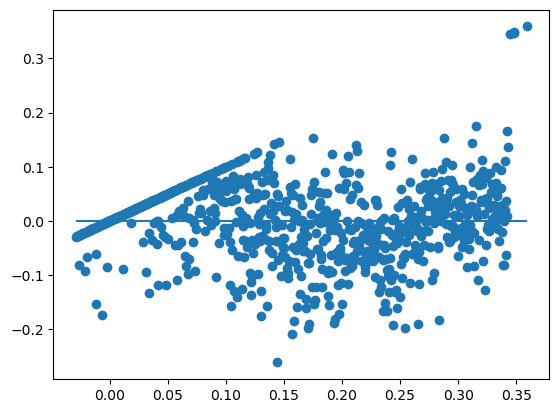

In [60]:
# Plot Residuals
plt.scatter(predictions_prod, error_prod)
plt.hlines(y=0, xmin=predictions_prod.min(), xmax=predictions_prod.max())
plt.show()

# Writing


In [62]:
writing_df = pd.read_csv("Resources/gender_calc/writing_percent.csv")
writing_df = writing_df.sort_values('release_date')
writing_df

,movie_id,release_date,percent_female
15401,83015,1950-01-01,0.0
11346,43391,1950-01-04,0.0
14057,65586,1950-01-06,0.0
6658,20088,1950-01-12,0.0
17858,151310,1950-01-13,1.0
...,...,...,...
19404,252983,2017-12-31,0.0
20252,302349,2018-03-01,0.0
10250,38700,2018-11-07,0.0
20214,299782,2018-12-31,0.0


In [64]:
# change release_date column from string to datetime
writing_df['release_date'] = pd.to_datetime(writing_df['release_date'])
writing_df.dtypes

movie_id                   int64
release_date      datetime64[ns]
percent_female           float64
dtype: object

In [66]:
# Use Pandas.to_datetime() and datetime.strftime() method to add year_month column
writing_df['year_month'] = pd.to_datetime(writing_df['release_date']).dt.strftime('%Y-%m')
writing_df

,movie_id,release_date,percent_female,year_month
15401,83015,1950-01-01,0.0,1950-01
11346,43391,1950-01-04,0.0,1950-01
14057,65586,1950-01-06,0.0,1950-01
6658,20088,1950-01-12,0.0,1950-01
17858,151310,1950-01-13,1.0,1950-01
...,...,...,...,...
19404,252983,2017-12-31,0.0,2017-12
20252,302349,2018-03-01,0.0,2018-03
10250,38700,2018-11-07,0.0,2018-11
20214,299782,2018-12-31,0.0,2018-12


In [67]:
# convert year_month column to datetime format
writing_df['year_month'] = pd.to_datetime(writing_df['year_month'])
writing_df.dtypes

movie_id                   int64
release_date      datetime64[ns]
percent_female           float64
year_month        datetime64[ns]
dtype: object

In [68]:
# convert year_month to ordinal for ML
writing_df['year_month']=writing_df['year_month'].map(dt.datetime.toordinal)
writing_df.dtypes

movie_id                   int64
release_date      datetime64[ns]
percent_female           float64
year_month                 int64
dtype: object

In [70]:
writ_count = writing_df.groupby(['year_month'])['percent_female'].mean()
writ_count

year_month
711858    0.125000
711889    0.060606
711917    0.027778
711948    0.000000
711978    0.125000
            ...   
736664    0.375000
736754    0.000000
736999    0.000000
737029    0.000000
737760    0.000000
Name: percent_female, Length: 820, dtype: float64

DONT RERUN

In [71]:
# Change from series to df
writing = writ_count.to_frame()

# Reset index  DO NOT RERUN
# Reset index  DO NOT RERUN
writing  = writing.rename_axis('year_month').reset_index()

# Review df
writing

,year_month,percent_female
0,711858,0.125000
1,711889,0.060606
2,711917,0.027778
3,711948,0.000000
4,711978,0.125000
...,...,...
815,736664,0.375000
816,736754,0.000000
817,736999,0.000000
818,737029,0.000000


Review data distribution before applying ML model

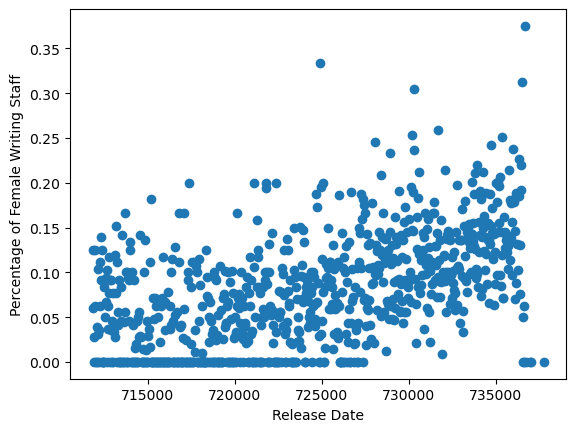

In [72]:
# Preview data
plt.scatter(writing.year_month, writing.percent_female)
plt.xlabel('Release Date')
plt.ylabel('Percentage of Female Writing Staff')
plt.show()

In [73]:
# Reshape values
Xw = writing.year_month.values.reshape(-1, 1)
Xw

array([[711858],
       [711889],
       [711917],
       [711948],
       [711978],
       [712009],
       [712039],
       [712070],
       [712101],
       [712131],
       [712162],
       [712192],
       [712223],
       [712254],
       [712282],
       [712313],
       [712343],
       [712374],
       [712404],
       [712435],
       [712466],
       [712496],
       [712527],
       [712557],
       [712588],
       [712619],
       [712648],
       [712679],
       [712709],
       [712740],
       [712770],
       [712801],
       [712832],
       [712862],
       [712893],
       [712923],
       [712954],
       [712985],
       [713013],
       [713044],
       [713074],
       [713105],
       [713135],
       [713166],
       [713197],
       [713227],
       [713258],
       [713288],
       [713319],
       [713350],
       [713378],
       [713409],
       [713439],
       [713470],
       [713500],
       [713531],
       [713562],
       [713592],
       [713623

In [74]:
yw = writing.percent_female
yw

0      0.125000
1      0.060606
2      0.027778
3      0.000000
4      0.125000
         ...   
815    0.375000
816    0.000000
817    0.000000
818    0.000000
819    0.000000
Name: percent_female, Length: 820, dtype: float64

In [75]:
model_writ = LinearRegression()

In [76]:
model_writ.fit(Xw, yw)

LinearRegression()

In [77]:
yw_pred = model_writ.predict(Xw)
print(yw_pred.shape)
print(len(yw_pred))

(820,)
820


In [78]:
Xw_transform = pd.Series(list(Xw))
Xw_transform = Xw_transform.apply(dt.datetime.fromordinal)
Xw_transform = pd.to_datetime(Xw_transform).dt.strftime('%Y-%m')
Xw_transform

0      1950-01
1      1950-02
2      1950-03
3      1950-04
4      1950-05
        ...   
815    2017-12
816    2018-03
817    2018-11
818    2018-12
819    2020-12
Length: 820, dtype: object

Writing Graph

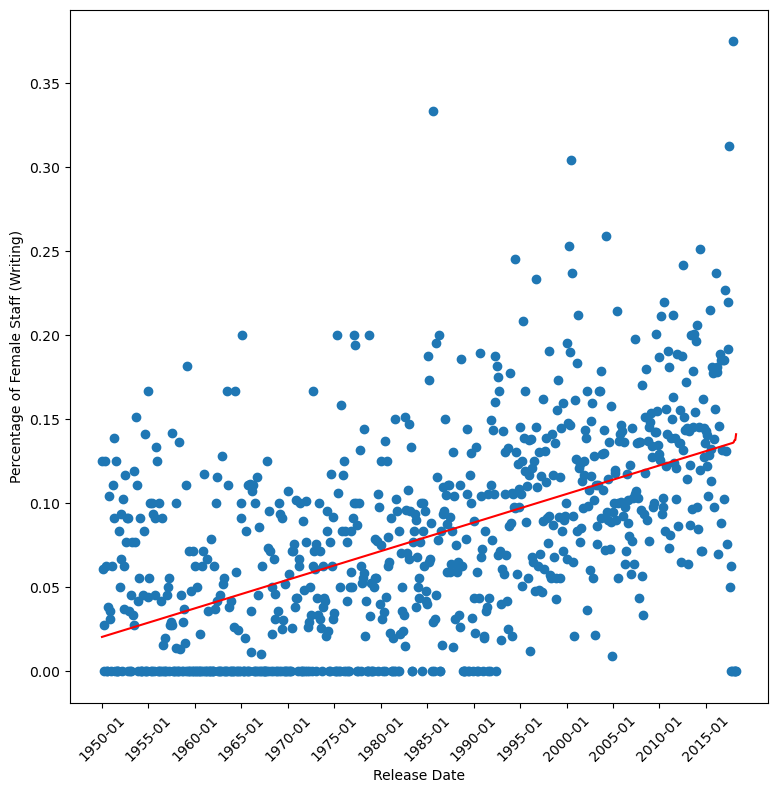

In [79]:
plt.figure(figsize=(9,9))

plt.scatter(Xw_transform, yw)
plt.plot(Xw_transform, yw_pred, color='red')
plt.xlabel('Release Date')
plt.ylabel('Percentage of Female Staff (Writing)')

plt.xticks(np.arange(0, len(Xw_transform)+1, 60),rotation=45)

plt.show()

Writing linear regression equation

In [80]:
print('Weight coefficients: ', model_writ.coef_)
print('y-axis intercept: ', model_writ.intercept_)

Weight coefficients:  [4.65801356e-06]
y-axis intercept:  -3.2954291198286927


In [81]:
writing.corr()

,year_month,percent_female
year_month,1.000000,0.535232
percent_female,0.535232,1.000000


Correlation of 0.53 shows no significant association between time and female participation in the writing department

When would we have a 50% of female participation in the Writing department according to the linear regression model?

In [82]:
writing_fiftypercent = calc_year_month(model_writ.coef_,model_writ.intercept_, 0.5)
print(writing_fiftypercent)

[814817.10389973]


Writing accuracy

In [86]:
predictions_writ = model_writ.predict(Xw)
# error delete prediction vs actual data
error_writ = predictions_writ - yw

In [87]:
writing_error_df = pd.DataFrame({"Predicted": predictions_writ, "Actual": yw, "Error": error_writ})[["Predicted", "Actual", "Error"]]
writing_error_df

,Predicted,Actual,Error
0,0.020415,0.125000,-0.104585
1,0.020559,0.060606,-0.040047
2,0.020690,0.027778,-0.007088
3,0.020834,0.000000,0.020834
4,0.020974,0.125000,-0.104026
...,...,...,...
815,0.135962,0.375000,-0.239038
816,0.136381,0.000000,0.136381
817,0.137522,0.000000,0.137522
818,0.137662,0.000000,0.137662


In [88]:
writing_error_df.describe()

,Predicted,Actual,Error
count,820.000000,820.000000,8.200000e+02
mean,0.078478,0.078478,2.599547e-17
std,0.033597,0.062771,5.302337e-02
min,0.020415,0.000000,-2.522383e-01
25%,0.049445,0.025189,-3.014605e-02
50%,0.078470,0.075758,5.272066e-03
75%,0.107495,0.119598,3.860044e-02
max,0.141067,0.375000,1.410670e-01


Residuals graph

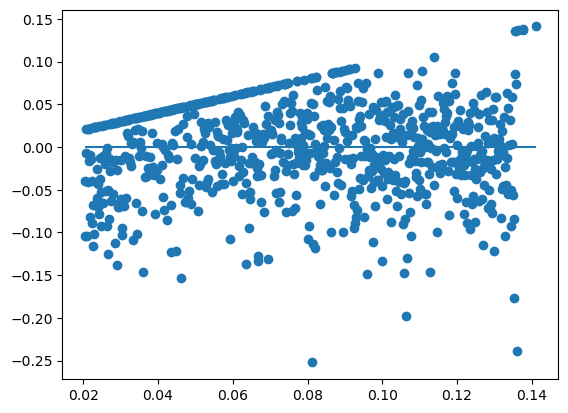

In [89]:
# Plot Residuals
plt.scatter(predictions_writ, error_writ)
plt.hlines(y=0, xmin=predictions_writ.min(), xmax=predictions_writ.max())
plt.show()

# Directing

In [92]:
# Load file
directing_df = pd.read_csv("Resources/gender_calc/directing_percent.csv")
directing_df = directing_df.sort_values('release_date')

In [93]:
# change release_date column from string to datetime
directing_df['release_date'] = pd.to_datetime(directing_df['release_date'])
directing_df.dtypes

movie_id                   int64
release_date      datetime64[ns]
percent_female           float64
dtype: object

In [94]:
# Use Pandas.to_datetime() and datetime.strftime() method to add year_month column
directing_df['year_month'] = pd.to_datetime(directing_df['release_date']).dt.strftime('%Y-%m')
directing_df

,movie_id,release_date,percent_female,year_month
17618,83015,1950-01-01,0.0,1950-01
19300,109364,1950-01-01,0.0,1950-01
12634,43395,1950-01-01,0.0,1950-01
12629,43387,1950-01-01,0.0,1950-01
14133,51411,1950-01-04,0.0,1950-01
...,...,...,...,...
22975,252983,2017-12-31,0.0,2017-12
24068,302349,2018-03-01,0.0,2018-03
11327,38700,2018-11-07,0.0,2018-11
24017,299782,2018-12-31,0.0,2018-12


In [95]:
# convert year_month column to datetime format
directing_df['year_month'] = pd.to_datetime(directing_df['year_month'])
directing_df.dtypes

movie_id                   int64
release_date      datetime64[ns]
percent_female           float64
year_month        datetime64[ns]
dtype: object

In [96]:
# convert year_month to ordinal for ML
directing_df['year_month']=directing_df['year_month'].map(dt.datetime.toordinal)
directing_df.dtypes

movie_id                   int64
release_date      datetime64[ns]
percent_female           float64
year_month                 int64
dtype: object

In [98]:
directing_count = directing_df.groupby(['year_month'])['percent_female'].mean()
directing_count

year_month
711858    0.000000
711889    0.000000
711917    0.000000
711948    0.000000
711978    0.041667
            ...   
736664    0.000000
736754    0.000000
736999    0.000000
737029    0.000000
737760    0.000000
Name: percent_female, Length: 820, dtype: float64

DONT RERUN

In [99]:
# Change from series to df
directing = directing_count.to_frame()

# Reset index  DO NOT RERUN
# Reset index  DO NOT RERUN
directing  = directing.rename_axis('year_month').reset_index()

# Review df
directing

,year_month,percent_female
0,711858,0.000000
1,711889,0.000000
2,711917,0.000000
3,711948,0.000000
4,711978,0.041667
...,...,...
815,736664,0.000000
816,736754,0.000000
817,736999,0.000000
818,737029,0.000000


Review data distribution before applying ML model

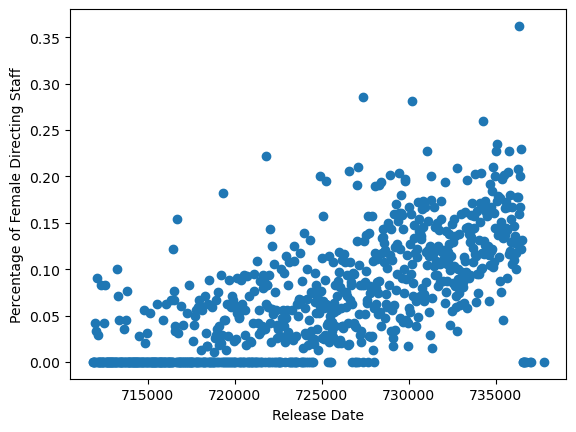

In [100]:
# Preview data
plt.scatter(directing.year_month, directing.percent_female)
plt.xlabel('Release Date')
plt.ylabel('Percentage of Female Directing Staff')
plt.show()

In [102]:
#  x axis 
Xd = directing.year_month.values.reshape(-1, 1)
Xd

array([[711858],
       [711889],
       [711917],
       [711948],
       [711978],
       [712009],
       [712039],
       [712070],
       [712101],
       [712131],
       [712162],
       [712192],
       [712223],
       [712254],
       [712282],
       [712313],
       [712343],
       [712374],
       [712404],
       [712435],
       [712466],
       [712496],
       [712527],
       [712557],
       [712588],
       [712619],
       [712648],
       [712679],
       [712709],
       [712740],
       [712770],
       [712801],
       [712832],
       [712862],
       [712893],
       [712923],
       [712954],
       [712985],
       [713013],
       [713044],
       [713074],
       [713105],
       [713135],
       [713166],
       [713197],
       [713227],
       [713258],
       [713288],
       [713319],
       [713350],
       [713378],
       [713409],
       [713439],
       [713470],
       [713500],
       [713531],
       [713562],
       [713592],
       [713623

In [103]:
yd = directing.percent_female
yd

0      0.000000
1      0.000000
2      0.000000
3      0.000000
4      0.041667
         ...   
815    0.000000
816    0.000000
817    0.000000
818    0.000000
819    0.000000
Name: percent_female, Length: 820, dtype: float64

In [104]:
model_dir = LinearRegression()

In [105]:
model_dir.fit(Xd, yd)

LinearRegression()

In [106]:
yd_pred = model_dir.predict(Xd)
print(yd_pred.shape)
print(len(yd_pred))

(820,)
820


In [107]:
Xd_transform = pd.Series(list(Xd))
Xd_transform = Xd_transform.apply(dt.datetime.fromordinal)
Xd_transform = pd.to_datetime(Xd_transform).dt.strftime('%Y-%m')
Xd_transform

0      1950-01
1      1950-02
2      1950-03
3      1950-04
4      1950-05
        ...   
815    2017-12
816    2018-03
817    2018-11
818    2018-12
819    2020-12
Length: 820, dtype: object

Direction Graph

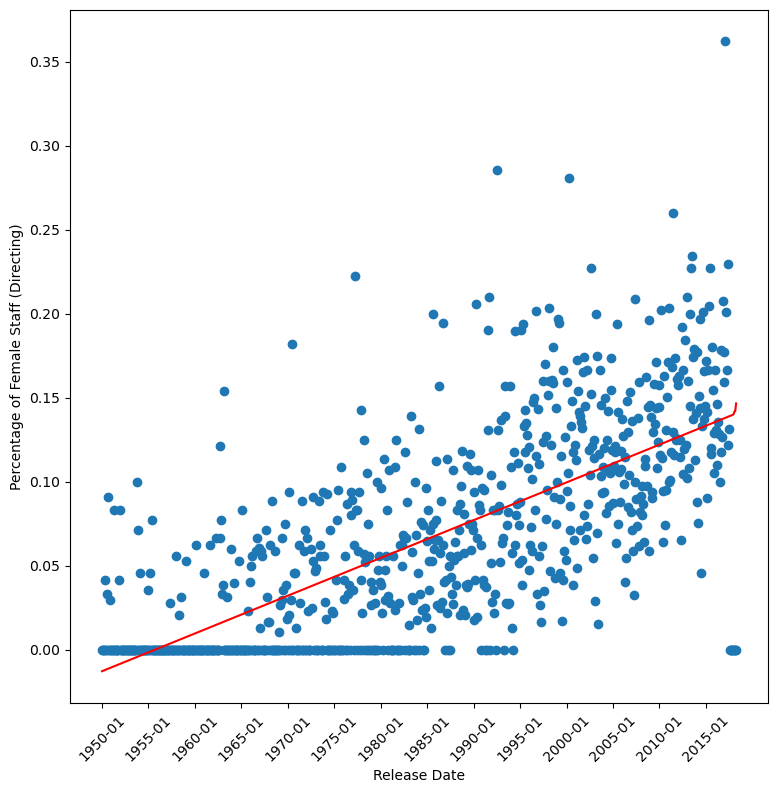

In [108]:
plt.figure(figsize=(9,9))

plt.scatter(Xd_transform, yd)
plt.plot(Xd_transform, yd_pred, color='red')
plt.xlabel('Release Date')
plt.ylabel('Percentage of Female Staff (Directing)')

plt.xticks(np.arange(0, len(Xd_transform)+1, 60),rotation=45)

plt.show()

Direction linear regression equation

In [109]:
print('Weight coefficients: ', model_dir.coef_)
print('y-axis intercept: ', model_dir.intercept_)

Weight coefficients:  [6.1527742e-06]
y-axis intercept:  -4.392743756919254


In [110]:
directing.corr()

,year_month,percent_female
year_month,1.000000,0.702976
percent_female,0.702976,1.000000


Correlation of 0.70 shows moderate positive correlation between time and female participation in the directing department

When would we have a 50% of female participation in the Directing department according to the linear regression model?

In [111]:
directing_fiftypercent = calc_year_month(model_dir.coef_,model_dir.intercept_, 0.5)
print(directing_fiftypercent)

[795209.38017146]


Directiong accuracy

In [112]:
predictions_dir = model_dir.predict(Xd)
# error delete prediction vs actual data
error_dir = predictions_dir - yd

In [113]:
directing_error_df = pd.DataFrame({"Predicted": predictions_dir, "Actual": yd, "Error": error_dir})[["Predicted", "Actual", "Error"]]
directing_error_df

,Predicted,Actual,Error
0,-0.012842,0.000000,-0.012842
1,-0.012651,0.000000,-0.012651
2,-0.012479,0.000000,-0.012479
3,-0.012288,0.000000,-0.012288
4,-0.012104,0.041667,-0.053771
...,...,...,...
815,0.139783,0.000000,0.139783
816,0.140337,0.000000,0.140337
817,0.141845,0.000000,0.141845
818,0.142029,0.000000,0.142029


In [114]:
writing_error_df.describe()

,Predicted,Actual,Error
count,820.000000,820.000000,8.200000e+02
mean,0.078478,0.078478,2.599547e-17
std,0.033597,0.062771,5.302337e-02
min,0.020415,0.000000,-2.522383e-01
25%,0.049445,0.025189,-3.014605e-02
50%,0.078470,0.075758,5.272066e-03
75%,0.107495,0.119598,3.860044e-02
max,0.141067,0.375000,1.410670e-01


Residuals graph

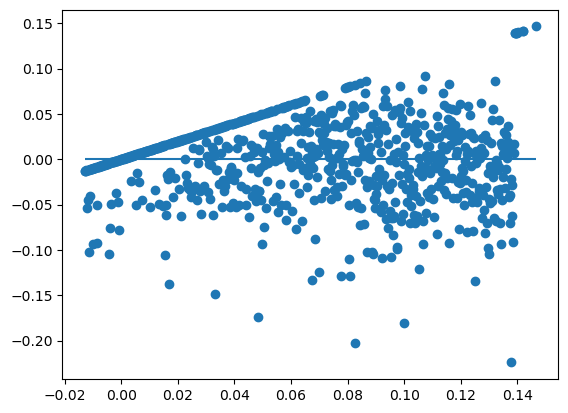

In [116]:
# Plot Residuals
plt.scatter(predictions_dir, error_dir)
plt.hlines(y=0, xmin=predictions_dir.min(), xmax=predictions_dir.max())
plt.show()